<a href="https://colab.research.google.com/github/Zerowl7/Monte_Carlo/blob/main/Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

In [1]:
365/23


15.869565217391305

# (Birthday problem)

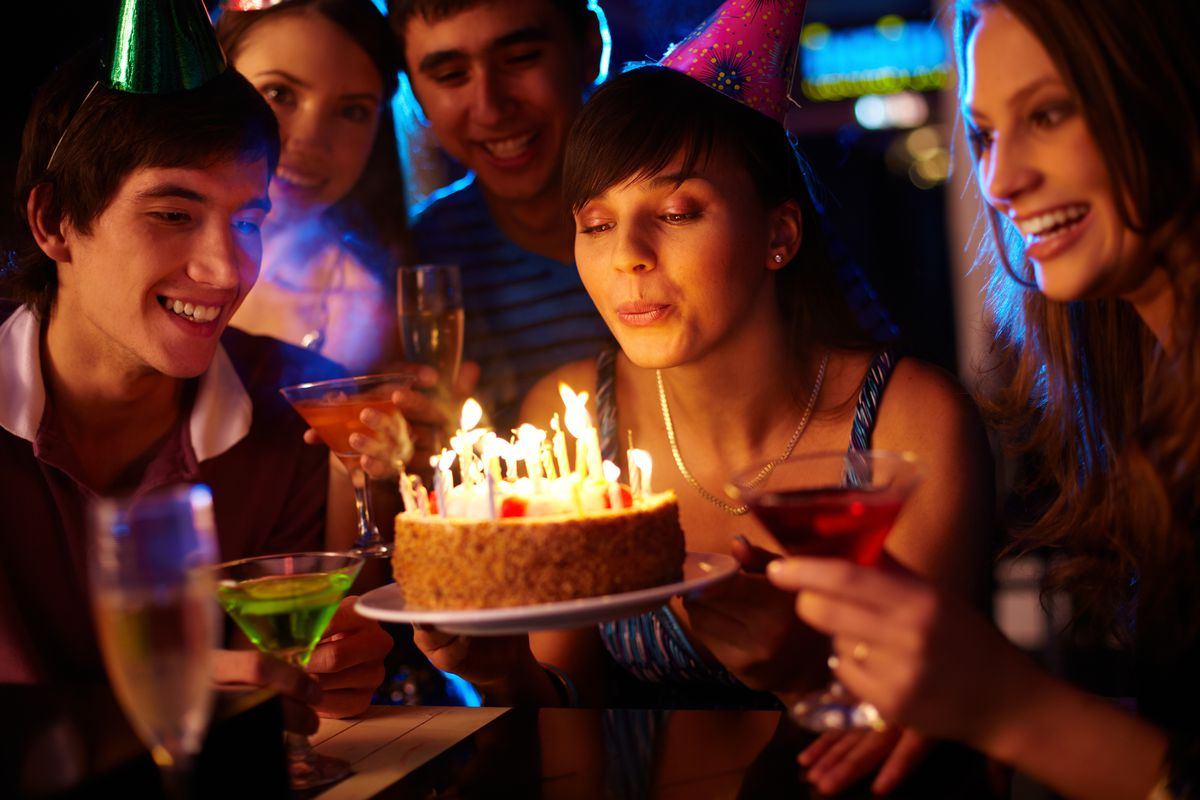

Дней в году

In [4]:
bd = pd.Series(range(365))

In [5]:
bd

0        0
1        1
2        2
3        3
4        4
      ... 
360    360
361    361
362    362
363    363
364    364
Length: 365, dtype: int64

Generate room

In [17]:
t = bd.sample(23, replace=True)

Search coincidences

In [18]:
t.duplicated()

357    False
37     False
155    False
143    False
16     False
14     False
263    False
183    False
32     False
220    False
140    False
139    False
61     False
202    False
180    False
245    False
352    False
352     True
198    False
228    False
61      True
336    False
65     False
dtype: bool

In [19]:
t.duplicated().max()

True

In [24]:
rooms = [bd.sample(23, replace=True).duplicated().max() for _ in range(10000)]

Probability

In [26]:
np.mean(rooms)

0.5114

# Student on examen

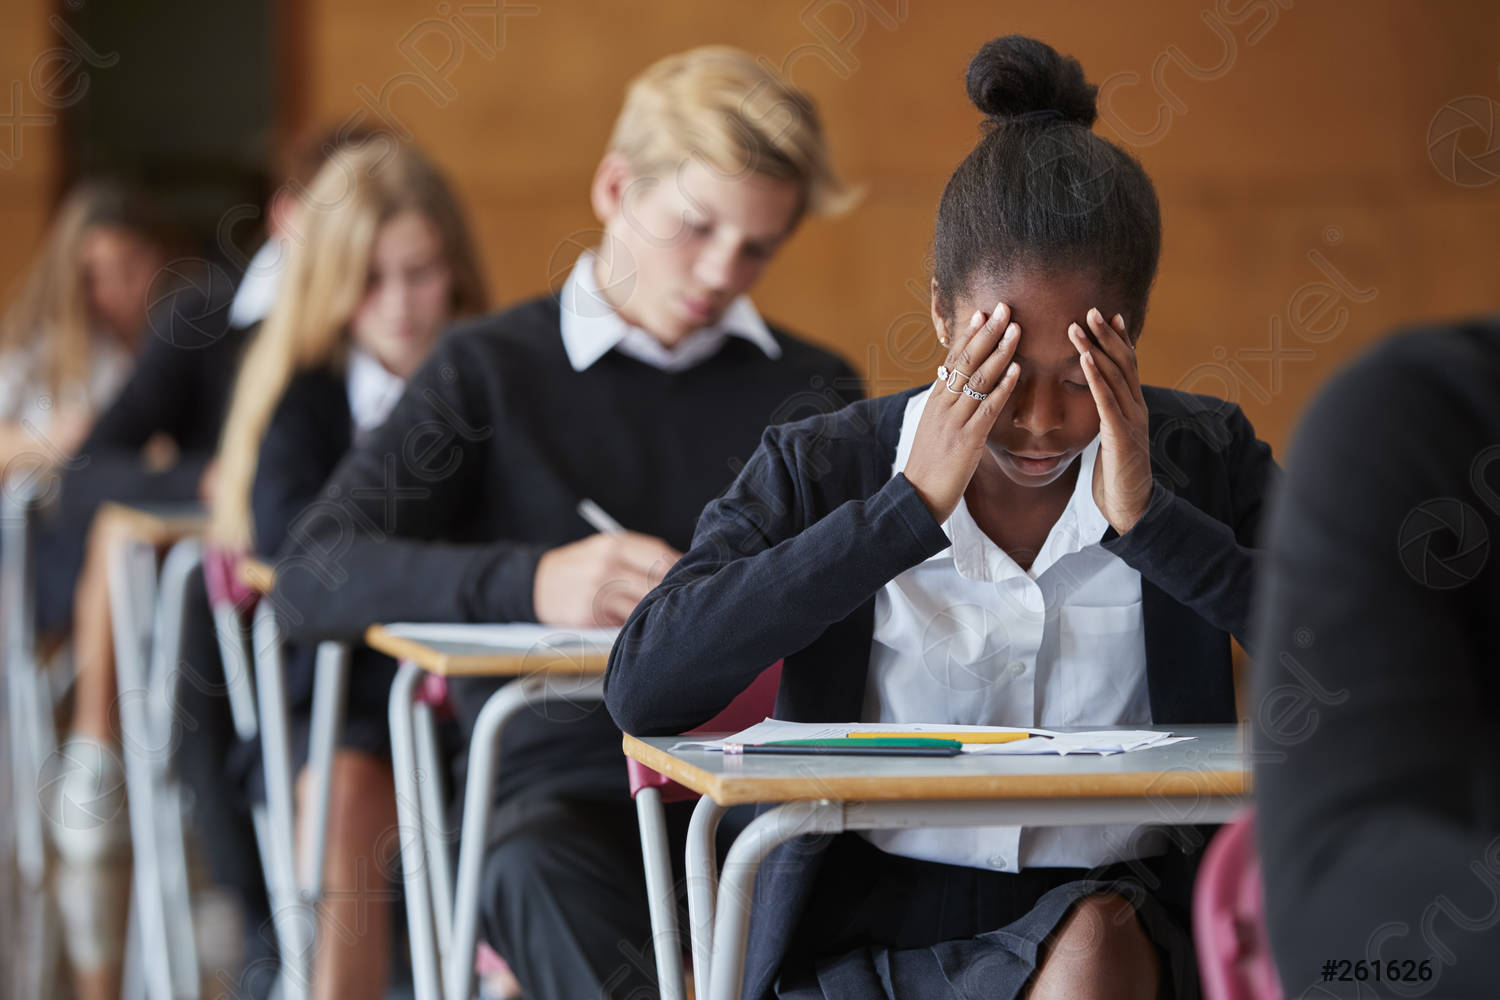

In [28]:
tickets = list(range(1,31))

In [29]:
tickets

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

In [30]:
student = list(range(1,21))

In [34]:
from random import shuffle

In [35]:
shuffle (tickets)

In [36]:
tickets

[6,
 2,
 8,
 12,
 1,
 26,
 4,
 7,
 27,
 18,
 13,
 19,
 30,
 23,
 15,
 20,
 3,
 22,
 5,
 24,
 25,
 17,
 9,
 28,
 10,
 29,
 16,
 14,
 11,
 21]

In [38]:
n = 10000
student = list(range(1,21))
tickets = list(range(1,31))
result = []

for _ in range(n):
  shuffle (tickets)
  result.append(tickets[0] in student)

Probability

In [39]:
np.mean(result)

0.6715

student will go second

In [40]:
n = 10000
student = list(range(1,21))
tickets = list(range(1,31))
result = []

for _ in range(n):
  shuffle (tickets)
  result.append(tickets[1] in student)

In [41]:
np.mean(result)

0.6733

# taxi damage

Generator taxi

In [45]:
np.random.binomial(1,0.15)

1

Generator witness

In [56]:
def witness(taxi):
  if np.random.binomial(1,0.8):
    return taxi
  return abs(taxi - 1)

In [57]:
witness(0)

0

In [58]:
n = 10000
result = []

for _ in range(n):
  taxi = np.random.binomial(1,0.15)
  w_answer = witness(taxi)
  result.append((taxi,w_answer))

In [59]:
np.mean(result)

0.22625

In [63]:
df = pd.DataFrame(result, columns=['taxi', 'w_answer'])

In [64]:
df.groupby('w_answer')['taxi'].mean()

w_answer
0    0.04559
1    0.42075
Name: taxi, dtype: float64